# Laboratorio 05: Cálculo Numérico.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Estefania Zapata Valderrama
*Métodos computacionales 2025-I*

---

# 1.

En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de $L$, la primera ley de Kirchhoff nos da la siguiente relación

$$
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
$$

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

```
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])  # tiempo
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])  # corriente
```


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L= 0.98$ H y la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee el metodo de diferencias finitas y de tres puntos para calcular la derivada numérica.
- Ahora, encuentre un polinomio de interpolación usando alguno de los métodos vistos y calcule la derivada 'exacta'. Compare sus resultados.

In [46]:
import numpy as np
import pandas as pd
from scipy.interpolate import lagrange, interp1d
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import quad, simpson, trapezoid, dblquad


In [8]:
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])
df = pd.DataFrame({'t (s)': t, 'I (A)': i})
df


,t (s),I (A)
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


In [11]:
# Derivada usando método de diferencias finitas
def forward_diff(f, x, h):
    return (f(x + h) - f(x)) / h

def backward_diff(f, x, h):
    return (f(x) - f(x - h)) / h

def centered_diff(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

def Derivada_Diferencias_Finitas(f, x, h):
    n = len(x)
    fprime = np.zeros_like(f)
    for i in range(n):
        if i == 0:
            fprime[i] = (f[i+1] - f[i]) / h
        elif i == n-1:
            fprime[i] = (f[i] - f[i-1]) / h
        else:
            fprime[i] = (f[i+1] - f[i-1]) / (2*h)
    return fprime



In [13]:
h = 0.01
derivada_df = Derivada_Diferencias_Finitas(i, t, h)
L = 0.98
R = 0.142
voltaje_df = L * derivada_df + R * i #Calculo de voltaje
df["di/dt (df)"] = derivada_df
df["ε(t) (df)"] = voltaje_df
df


,t (s),I (A),di/dt (df),ε(t) (df)
0,1.00,3.10,2.0,2.40020
1,1.01,3.12,2.0,2.40304
2,1.02,3.14,3.0,3.38588
3,1.03,3.18,5.0,5.35156
4,1.04,3.24,6.0,6.34008


In [14]:
def Derivada_Tres_Puntos(f, x, h):
    n = len(x)
    fprime = np.zeros_like(f)

    for i in range(n):
        if i == 0:
            fprime[i] = (-3*f[i] + 4*f[i+1] - f[i+2]) / (2*h)
        elif i == n - 1:
            fprime[i] = (3*f[i] - 4*f[i-1] + f[i-2]) / (2*h)
        else:
            fprime[i] = (f[i+1] - f[i-1]) / (2*h)
    return fprime

derivada_3p = Derivada_Tres_Puntos(i, t, h)
voltaje_3p = L * derivada_3p + R * i

df["di/dt (3 puntos)"] = derivada_3p
df["ε(t) (3 puntos)"] = voltaje_3p
df


,t (s),I (A),di/dt (df),ε(t) (df),di/dt (3 puntos),ε(t) (3 puntos)
0,1.00,3.10,2.0,2.40020,2.0,2.40020
1,1.01,3.12,2.0,2.40304,2.0,2.40304
2,1.02,3.14,3.0,3.38588,3.0,3.38588
3,1.03,3.18,5.0,5.35156,5.0,5.35156
4,1.04,3.24,6.0,6.34008,7.0,7.32008


In [20]:
p_lagrange = lagrange(t, i) #interpolacion

x = sp.Symbol('x')
p_sym = sum(sp.nsimplify(c) * x**i for i, c in enumerate(p_lagrange.coefficients[::-1])) # Convertimos a expresión simbólica
derivada_exacta = sp.diff(p_sym, x)

derivada_exacta_func = sp.lambdify(x, derivada_exacta, 'numpy')

derivada_exacta_eval = derivada_exacta_func(t) #derivada evaluada en los puntos
voltaje_exacto = L * derivada_exacta_eval + R * i

df["di/dt (interp)"] = derivada_exacta_eval
df["ε(t) (interp)"] = voltaje_exacto
df


,t (s),I (A),di/dt (df),ε(t) (df),di/dt (3 puntos),ε(t) (3 puntos),di/dt (interp),ε(t) (interp)
0,1.00,3.10,2.0,2.40020,2.0,2.40020,3.166667,3.543533
1,1.01,3.12,2.0,2.40304,2.0,2.40304,1.500000,1.913040
2,1.02,3.14,3.0,3.38588,3.0,3.38588,2.833333,3.222547
3,1.03,3.18,5.0,5.35156,5.0,5.35156,5.166667,5.514893
4,1.04,3.24,6.0,6.34008,7.0,7.32008,6.500000,6.830080


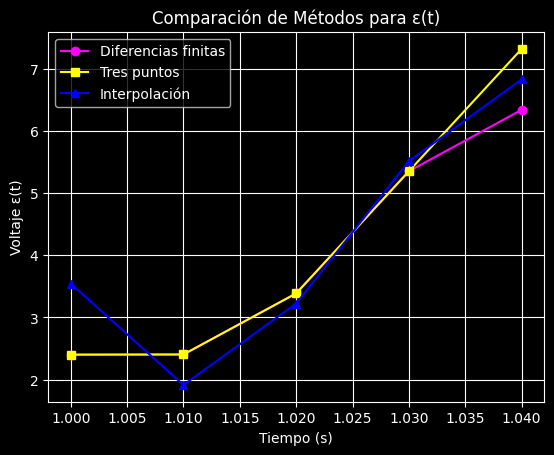

In [25]:
#Grafico comparativo

plt.style.use('dark_background')
plt.plot(t, voltaje_df, 'o-', label='Diferencias finitas', color='magenta')
plt.plot(t, voltaje_3p, 's-', label='Tres puntos', color='yellow')
plt.plot(t, voltaje_exacto, '^-', label='Interpolación', color='blue')
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje ε(t)")
plt.title("Comparación de Métodos para ε(t)")
plt.legend()
plt.grid()
plt.show()


# 2.
Utilizando los siguientes datos de tiempo y distancia:

```
t = np.array([0, 3, 5, 8, 10, 13])  # Tiempo en s
x = np.array([0, 225, 383, 623, 742, 993])  # Distancia recorrida en m
```

- Determinar la velocidad instantanea para cada uno de los tiempos y distancias mostrados.

- ¿Cuál será la velocidad para $t=12$?




In [29]:
t = np.array([0, 3, 5, 8, 10, 13])
x = np.array([0, 225, 383, 623, 742, 993])
vel = np.gradient(x, t)

for i in range(len(t)):
    print("t =", t[i], "s -> v =", round(vel[i], 2), "m/s")

v_interp = interp1d(t, vel, kind='cubic') #velocidad en t = 12
v12 = v_interp(12)

print(f"Velocidad estimada en t = 12 s: {v12:.2f} m/s")

t = 0 s -> v = 75.0 m/s
t = 3 s -> v = 77.4 m/s
t = 5 s -> v = 79.4 m/s
t = 8 s -> v = 67.7 m/s
t = 10 s -> v = 69.17 m/s
t = 13 s -> v = 83.67 m/s
Velocidad estimada en t = 12 s: 78.30 m/s


# 3.
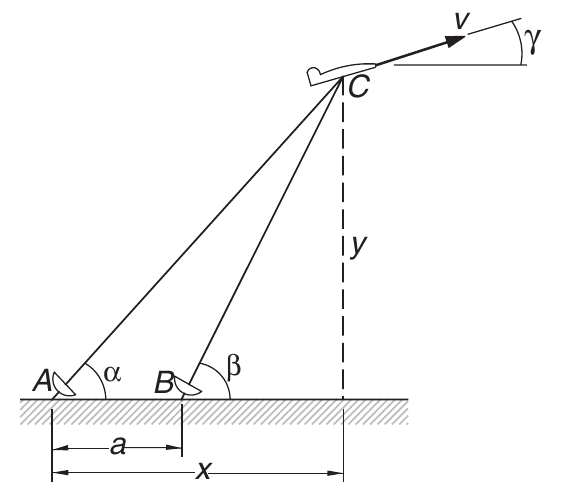


Las estaciones de radar $A$ y $B$, separadas por una distancia $a = 500 \, \text{m}$, rastrean un avión $C$ registrando los ángulos $\alpha$ y $\beta$ en intervalos de 1 segundo. Tres lecturas sucesivas son


```
data = {
    't (s)': [9, 10, 11],
    'alpha (°)': [54.80, 54.06, 53.34],
    'beta (°)': [65.59, 64.59, 63.62]
}

df = pd.DataFrame(data)
```

Calcular la velocidad $v$ del avión y el ángulo de ascenso $\gamma$ en $t = 10 \, \text{s}$. Las coordenadas del avión pueden expresarse como:

$$
x = a \frac{\tan \beta}{\tan \beta - \tan \alpha}
$$

$$
y = a \frac{\tan \alpha \tan \beta}{\tan \beta - \tan \alpha}
$$

In [31]:
data = {
    't (s)': [9, 10, 11],
    'alpha (°)': [54.80, 54.06, 53.34],
    'beta (°)': [65.59, 64.59, 63.62]
}

df = pd.DataFrame(data)
a = 500

# ángulos a radianes
alpha_rad = np.radians(df['alpha (°)'])
beta_rad = np.radians(df['beta (°)'])

tan_alpha = np.tan(alpha_rad)
tan_beta = np.tan(beta_rad)
den = tan_beta - tan_alpha

x = a * (tan_beta / den)
y = a * (tan_alpha * tan_beta / den)


df["x (m)"] = x
df["y (m)"] = y
df


,t (s),alpha (°),beta (°),x (m),y (m)
0,9,54.80,65.59,1401.918398,1987.346016
1,10,54.06,64.59,1450.497006,2000.840713
2,11,53.34,63.62,1498.640350,2013.512411


In [32]:
# Extraer t, x y y como arrays
t = df["t (s)"].to_numpy()
x = df["x (m)"].to_numpy()
y = df["y (m)"].to_numpy()

# Derivadas centradas en t = 10 s
# (usamos puntos t=9 y t=11, paso h=1)
vx = (x[2] - x[0]) / (t[2] - t[0])
vy = (y[2] - y[0]) / (t[2] - t[0])

v = np.sqrt(vx**2 + vy**2)
gamma_rad = np.arctan(vy / vx)
gamma_deg = np.degrees(gamma_rad)

print(f"🔹 Velocidad en t = 10 s: v = {v:.2f} m/s")
print(f"🔹 Ángulo de ascenso en t = 10 s: γ = {gamma_deg:.2f}°")


🔹 Velocidad en t = 10 s: v = 50.10 m/s
🔹 Ángulo de ascenso en t = 10 s: γ = 15.14°


# 4.
Se proporcionan los siguientes datos para la velocidad de un objeto en función del tiempo:

```
# Datos de tiempo y velocidad
t = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])  # segundos
v = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])  # m/s
```
- ¿Qué tan lejos viaja el objeto desde $t = 0$ hasta 28 s?
- ¿Cuál es la aceleración del objeto a $t = 28$ s?

In [34]:
t = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])
v = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])

# Filtrar datos hasta t = 28 s
t_0_28 = t[:8+1]
v_0_28 = v[:8+1]
distancia = np.trapezoid(v_0_28, t_0_28)

print(f"Distancia recorrida entre 0 y 28 s : {distancia:.2f} m")



Distancia recorrida entre 0 y 28 s : 2839.80 m


In [35]:
# Aceleración en t = 28 s usando diferencia centrada
t1, t2 = 24, 32
v1, v2 = 121.9, 135.7

aceleracion = (v2 - v1) / (t2 - t1)
print(f"Aceleración en t = 28 s: {aceleracion:.2f} m/s²")


Aceleración en t = 28 s: 1.72 m/s²


# 5.

El área superficial horizontal $A_s$ ($m^2$) de un lago a una profundidad particular puede calcularse a partir del volumen por diferenciación:

$$A_s(z) = -\frac{dV(z)}{dz}$$

donde:
- $V$ = volumen ($m^3$)
- $z$ = profundidad ($m$) medida desde la superficie hacia el fondo


La concentración promedio de una sustancia que varía con la profundidad $c$ ($g/m^3$) puede calcularse por integración:

$$c = \frac{\int_0^Z c(z)A_s(z) dz}{V_T}$$

donde:
- $Z$ = profundidad total (m)
- $V_T$ = volumen total del lago, dado también por:


$$V_T = \int_0^Z A_s(z) dz$$
Con base en los siguientes datos, determine la concentración promedio.
```
# Datos proporcionados
z = np.array([0, 4, 8, 12, 16])  # profundidad en metros
V = np.array([9.8175, 5.1051, 1.9635, 0.3927, 0.0000]) * 1e6  # volumen en m³
c = np.array([10.2, 8.5, 7.4, 5.2, 4.1])  # concentración en g/m³

# Parámetros importantes
Z = z[-1]  # profundidad total (16 m)
```

In [38]:
z = np.array([0, 4, 8, 12, 16])
V = np.array([9.8175, 5.1051, 1.9635, 0.3927, 0.0000]) * 1e6
c = np.array([10.2, 8.5, 7.4, 5.2, 4.1])

# Calculo As(z) = -dV/dz
dV_dz = np.gradient(V, z)
As = -dV_dz

# Calculo volumen total
VT = simpson(As, z)

numerador = simpson(c * As, z)
c_prom = numerador / VT

print(f"Concentración promedio: {c_prom:.4f} g/m³")


Concentración promedio: 8.0973 g/m³


# 6.
La función de onda del electrón en estado 2s ($n=2$, $l=0$, $m=0$) en unidades radiales adimensionales es:

$$\psi_{200}(r,\theta,\varphi) = \frac{1}{4\sqrt{2\pi}} (2 - r) e^{-r/2}$$

La probabilidad de encontrar el electrón entre $r=0$ y $r=R$ está dada por:

$$P(R) = \frac{1}{8} \int_0^R r^2 (2 - r)^2 e^{-r} dr$$

donde las integrales angulares contribuyen un factor de $4\pi$.

- Calcule las probabilidades $P(R)$ para $R \in [10,25]$ con incrementos de 1 utilizando los métodos:
    - Trapezoidal
    - Simpson
    - Cuadratura
    
Garantizando que el error sea menor a $\varepsilon = 10^{-6}$
- Calcule la integral radial desde $r=0$ hasta $+\infty$, verifique que la probabilidad total sea 1.



In [45]:
def integrando(r):
    return r**2 * (2 - r)**2 * np.exp(-r)

R_vals = np.arange(10, 26, 1)

P_trap = []
P_simp = []
P_quad = []

# Número de puntos para trapecio y Simpson
num_points = 1000

for R in R_vals:
    r = np.linspace(0, R, num_points)
    y = integrando(r)

    P_trap.append((1/8) * trapezoid(y, r))

    P_simp.append((1/8) * simpson(y, r))

    result, error = quad(integrando, 0, R, epsabs=1e-7)
    P_quad.append((1/8) * result)


df_resultados = pd.DataFrame({
    'Radio': R_vals,
    'Trapecio': P_trap,
    'Simpson': P_simp,
    'Cuadratura': P_quad
})
print(df_resultados)

total_prob, _ = quad(integrando, 0, np.inf)
print(f"\nProbabilidad total (de 0 a ∞): {(1/8)*total_prob:.8f}")


    Radio  Trapecio   Simpson  Cuadratura
0      10  0.940481  0.940481    0.940481
1      11  0.968223  0.968223    0.968223
2      12  0.983552  0.983552    0.983552
3      13  0.991708  0.991708    0.991708
4      14  0.995913  0.995913    0.995913
5      15  0.998025  0.998025    0.998025
6      16  0.999062  0.999062    0.999062
7      17  0.999561  0.999561    0.999561
8      18  0.999797  0.999797    0.999797
9      19  0.999908  0.999908    0.999908
10     20  0.999958  0.999958    0.999958
11     21  0.999981  0.999981    0.999981
12     22  0.999992  0.999992    0.999992
13     23  0.999996  0.999996    0.999996
14     24  0.999998  0.999998    0.999998
15     25  0.999999  0.999999    0.999999

Probabilidad total (de 0 a ∞): 1.00000000


# 7.
Una lámina cuadrada uniforme de metal flota inmóvil en el espacio:

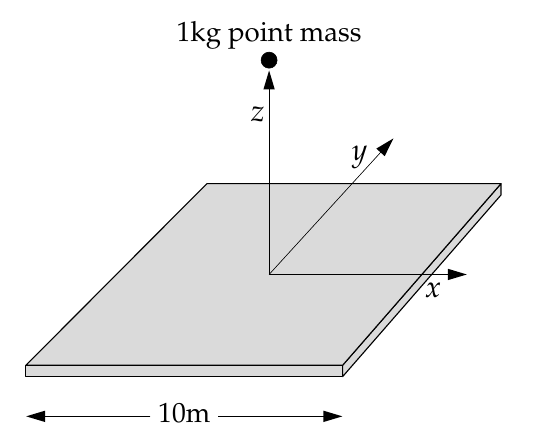

La lámina cuadrada tiene 10 m de lado y espesor despreciable. La componente de la fuerza gravitacional a lo largo del eje $z$ sobre una masa de prueba de 1 kg ubicada a distancia $z$ del centro de la lámina es:

$$F_z = G\sigma z \iint_{-L/2}^{L/2} \frac{dx \, dy}{(x^2 + y^2 + z^2)^{3/2}}$$

donde $G = 6.674 \times 10^{-11} \, \text{m}^3 \, \text{kg}^{-1} \, \text{s}^{-2}$, $\sigma = \frac{M}{L^2}$, $L = 10$ m y $M = 10,000$ kg.

- Calcular numéricamente esta integral doble.
- Graficar $F_z$ como función de $z$ desde $z=0$ hasta $z=10$ m


In [48]:
G = 6.674e-11
M = 10000
L = 10
sigma = M / (L**2)

a = -L/2
b = L/2

def integrando(y, x, z):
    return 1 / (x**2 + y**2 + z**2)**(3/2)

#evitamos z=0 porque es singular)
z_vals = np.linspace(0.1, 10, 100)
Fz_vals = []

for z in z_vals:
    integral, _ = dblquad(integrando, a, b, lambda x: a, lambda x: b, args=(z,))
    Fz = G * sigma * z * integral
    Fz_vals.append(Fz)

print(f'El valor de la integral es:{integral}')


El valor de la integral es:0.08054316831613231


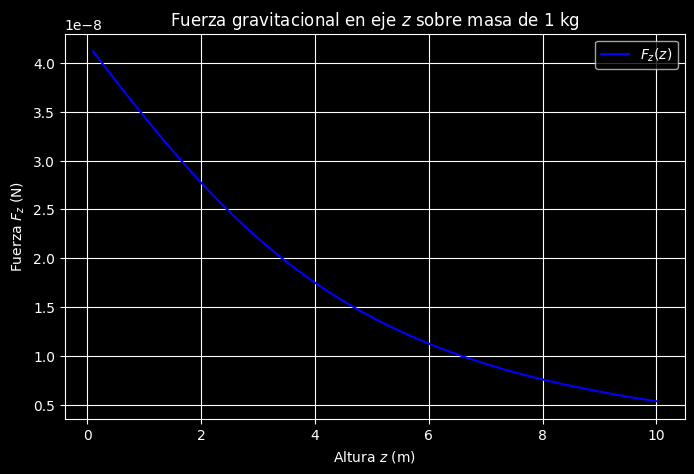

In [49]:
plt.style.use('dark_background')
plt.figure(figsize=(8, 5))
plt.plot(z_vals, Fz_vals, label=r'$F_z(z)$', color='blue')
plt.xlabel('Altura $z$ (m)')
plt.ylabel('Fuerza $F_z$ (N)')
plt.title('Fuerza gravitacional en eje $z$ sobre masa de 1 kg')
plt.grid(True)
plt.legend()
plt.show()